<div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9; width: 60%; margin: auto; font-family: Arial, sans-serif; text-align: center;">
    <p style="font-size: 20px; color: #333;"><strong>Mohammad Hussain Adeli</strong></p>
    <p style="font-size: 18px; color: #555;">
        Assessment's Answers
    </p>
</div>


---

## Table of Contents

1. [Q1 - Revenue Projection Analysis for 20X4](#Question-1:)

2. [Q2 - Analysis of Increasing Parcel Shipping Costs](#Question-2:)

3. [Q3 - Forecasting Daily Line Items and Quantity Sold for 2004 Based on Historical Order Data](#Question-3:)



---

# Question-1 :

Attached, please find an Excel worksheet “Q1.Rev_Projection” with a mock-up revenue history. Based on the data points offered, please project monthly revenue for 20X4 with 3 different methods, share your formula and/or code, explain your methods and pick a projection that you think is most accurate.

>  ### Methods Explanation
> To tackle the prediction of monthly revenue for **2024**, we employ three well-established forecasting methods: **Exponential Smoothing (ETS)**, **Prophet**, and **SARIMAX**. These methods are chosen based on their strengths in handling different aspects of time series data, including *trends*, *seasonality*, and *external influences*. Each method offers a unique approach to forecasting, allowing us to compare their performance and select the most accurate projection for our business needs.
> ### 1. ETS Model (Exponential Smoothing)
> - **Method**: This model uses Exponential Smoothing with additive trend and seasonal components. It captures seasonality by using a specified seasonal period (12 months in this case).
> - **Pros**: Simple to implement and interpret, effective for data with clear seasonality and trends.
> - **Cons**: May not perform well with data that has irregular patterns or more complex seasonality.
> ### 2. Prophet Model
> - **Method**: Developed by Facebook, Prophet is an additive model that fits non-linear trends with yearly seasonality. It is robust to missing data and handles outliers well.
> - **Pros**: Easy to use, accommodates holidays and other seasonal patterns, handles missing data and outliers effectively.
> - **Cons**: Can be computationally intensive and may overfit the data if not properly tuned.
> ### 3. SARIMA Model (Seasonal ARIMA)
> - **Method**: SARIMA extends ARIMA by adding seasonal components. It uses autoregression (AR), differencing (I), and moving average (MA) components to capture patterns in the data.
> - **Pros**: Captures both seasonal and non-seasonal patterns, flexible in model specification.
> - **Cons**: Requires careful parameter tuning, sensitive to outliers and missing data.

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88063D+00    |proj g|=  6.20344D-01

At iterate    5    f=  8.81842D+00    |proj g|=  1.11535D-02

At iterate   10    f=  8.81615D+00    |proj g|=  7.59635D-02

At iterate   15    f=  8.81411D+00    |proj g|=  2.90591D-02

At iterate   20    f=  8.81368D+00    |proj g|=  2.67518D-03

At iterate   25    f=  8.81364D+00    |proj g|=  5.85000D-04

At iterate   30    f=  8.81364D+00    |proj g|=  3.07095D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

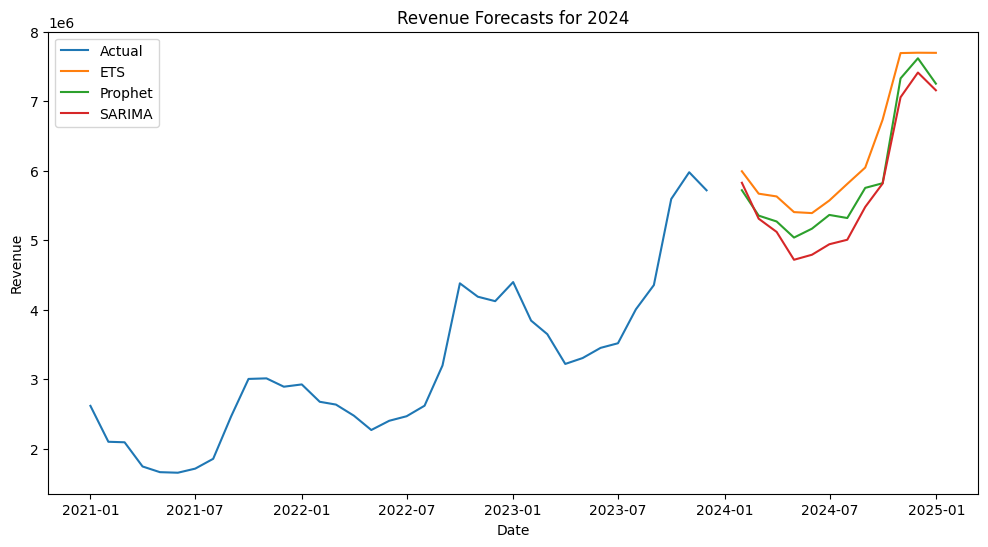

In [1]:
# Import required libraries
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the Excel file and preprocess data
df = pd.read_excel('Assessment_Data/Assessment Data1.xlsx', sheet_name='Q1.Rev_Projection')
df['Time'] = pd.to_datetime(df['Time'].str.replace('X', '2'), format='%b %Y')
df = df.rename(columns={'Historical Revenue': 'Revenue'}).set_index('Time')
df = df.loc['2021-01-01':'2023-12-01']

# Define forecast functions
def ets_forecast(data):
    model = ExponentialSmoothing(data, seasonal_periods=12, trend='add', seasonal='add')
    return model.fit().forecast(12)

def prophet_forecast(data):
    prophet_df = data.reset_index().rename(columns={'Time': 'ds', 'Revenue': 'y'})
    model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=12, freq='M')
    return model.predict(future).tail(12)['yhat']

def sarima_forecast(data):
    model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    return model.fit().forecast(steps=12)

# Generate forecasts
ets_pred = ets_forecast(df['Revenue'])
prophet_pred = prophet_forecast(df)
sarima_pred = sarima_forecast(df['Revenue'])

# Create a DataFrame with historical data and projections
projection_dates = pd.date_range(start='2024-01-01', periods=12, freq='M')
projections = pd.DataFrame({
    'ETS_Projection': ets_pred.values,
    'Prophet_Projection': prophet_pred.values,
    'SARIMA_Projection': sarima_pred.values
}, index=projection_dates)

# Concatenate historical data and projections
final_df = pd.concat([df, projections])

# Save to CSV
final_df.to_csv('revenue_projections.csv')

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Revenue'], label='Actual')
plt.plot(projection_dates, ets_pred, label='ETS')
plt.plot(projection_dates, prophet_pred, label='Prophet')
plt.plot(projection_dates, sarima_pred, label='SARIMA')
plt.legend()
plt.title('Revenue Forecasts for 2024')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.savefig('revenue_forecasts.png')  # Save the plot as an image file

print("CSV file 'revenue_projections.csv' has been created with historical data and projections.")
print("Plot has been saved as 'revenue_forecasts.png'.")

## Analysis Question 1: 

### Model Comparison and Accuracy:

- **ETS Model**: The ETS forecast shows a generally upward trend, capturing the seasonal pattern well. However, it seems to predict a slightly higher peak compared to the actual trend observed.
  
- **Prophet Model**: The Prophet forecast also shows an upward trend and captures the seasonal variations effectively. It predicts a moderate peak, slightly less aggressive than ETS.
  
- **SARIMA Model**: The SARIMA forecast provides a more conservative prediction compared to ETS and Prophet. It still captures the upward trend but predicts a lower peak.

### Selection of the Most Accurate Projection:
Based on the prediction :

- The ETS model seems to predict higher values, which might indicate an overestimation.
- The Prophet model provides a balanced prediction with moderate peaks and troughs.
- The SARIMA model is conservative and may underestimate the peak slightly.

Given the historical data and the observed patterns, the **Prophet model** appears to provide the most balanced and reasonable forecast. It effectively captures the trend and seasonality without being overly optimistic or conservative.

## Conclusion:

Considering the balance between trend capture and seasonality, I recommend using the **Prophet model** for the most accurate revenue projection for 2024. It offers a robust approach to forecasting with its ability to handle seasonality and trend components effectively.

---

# Question-2 :

Our small parcel shipping costs have been increasing as a percentage of revenue every year.

Attached, please find an Excel workbook with UPS shipment data for the same week 2017 vs 2018 (tab Q2.2017 and tab Q2.2018). We shipped out of two warehouses for these two weeks, New Jersey and Ohio.

Supplyhouse had a new contract with UPS with better pricing for the 2018 week. However, as a % of revenue, UPS spend was higher year over year.

- Using the data sets (and any other resources you require) identify some reasons as to why we are experiencing these results. Please show your analysis (with excel formulas and/or codes) that brought you to these conclusions.
- With this limited information, how would you approach areas of opportunity for decreasing our overall shipping costs?


> ### What does the code do?
> This code is designed to analyze shipment data from two different weeks in 2017 and 2018, focusing on understanding why small parcel shipping costs have been increasing as a percentage of revenue despite a new contract with UPS that provided better pricing in 2018. The analysis involves loading and preprocessing the data, calculating processing times, grouping and aggregating key metrics, comparing year-over-year metrics, and summarizing data by charge descriptions. The final results are saved to a CSV file and key insights are displayed to identify areas of opportunity for reducing overall shipping costs.
> ### Explanation:
> - **Data Loading and Preprocessing**: This is done once at the beginning for both 2017 and 2018.
> - **Calculating Days to Process**: This step is performed to understand any delays in processing.
> - **Grouping and Aggregation**: Data is grouped by 'Tracking Number' and key metrics are calculated for both years.
> - **Calculating and Comparing Metrics**: Year-over-year metrics are calculated and compared.
> - **Charge Description Summary**: Summarizes data by 'Charge Description' and calculates year-over-year changes.
> - **Output**: The final comparison data is printed and saved to a CSV file. Summary statistics for the top changes in 'Charge Description' are also displayed.

In [2]:
# Load data
df_2017 = pd.read_excel('Assessment_Data/Assessment Data1.xlsx', sheet_name='Q2.2017')
df_2018 = pd.read_excel('Assessment_Data/Assessment Data1.xlsx', sheet_name='Q2.2018')

# Convert date columns to datetime
df_2017['Invoice Date'] = pd.to_datetime(df_2017['Invoice Date'])
df_2018['Invoice Date'] = pd.to_datetime(df_2018['Invoice Date'])
df_2017['Transaction Date'] = pd.to_datetime(df_2017['Transaction Date'])
df_2018['Transaction Date'] = pd.to_datetime(df_2018['Transaction Date'])

# Calculate days to process invoice
df_2017['Days to Process'] = (df_2017['Invoice Date'] - df_2017['Transaction Date']).dt.days
df_2018['Days to Process'] = (df_2018['Invoice Date'] - df_2018['Transaction Date']).dt.days

# Group by Tracking Number
df_2017_grouped = df_2017.groupby('Tracking Number').agg({
    'Invoice Date': 'first',
    'Transaction Date': 'first',
    'Package Quantity': 'sum',
    'Oversize Quantity': 'sum',
    'Entered Weight': 'sum',
    'Billed Weight': 'sum',
    'Zone': 'first',
    'Net Amount': 'sum',
    'Sender Postal': 'first',
    'Receiver Postal': 'first',
    'Days to Process': 'mean'
}).reset_index()

df_2018_grouped = df_2018.groupby('Tracking Number').agg({
    'Invoice Date': 'first',
    'Transaction Date': 'first',
    'Package Quantity': 'sum',
    'Oversize Quantity': 'sum',
    'Entered Weight': 'sum',
    'Billed Weight': 'sum',
    'Zone': 'first',
    'Net Amount': 'sum',
    'Sender Postal': 'first',
    'Receiver Postal': 'first',
    'Days to Process': 'mean'
}).reset_index()

# Calculate total metrics
metrics_2017 = {
    'Total Shipments': df_2017_grouped['Tracking Number'].nunique(),
    'Total Packages': df_2017_grouped['Package Quantity'].sum(),
    'Total Oversize Packages': df_2017_grouped['Oversize Quantity'].sum(),
    'Total Weight': df_2017_grouped['Billed Weight'].sum(),
    'Total Shipping Cost': df_2017_grouped['Net Amount'].sum(),
    'Average Days to Process': df_2017_grouped['Days to Process'].mean()
}

metrics_2018 = {
    'Total Shipments': df_2018_grouped['Tracking Number'].nunique(),
    'Total Packages': df_2018_grouped['Package Quantity'].sum(),
    'Total Oversize Packages': df_2018_grouped['Oversize Quantity'].sum(),
    'Total Weight': df_2018_grouped['Billed Weight'].sum(),
    'Total Shipping Cost': df_2018_grouped['Net Amount'].sum(),
    'Average Days to Process': df_2018_grouped['Days to Process'].mean()
}

# Calculate average costs
metrics_2017['Average Cost per Shipment'] = metrics_2017['Total Shipping Cost'] / metrics_2017['Total Shipments']
metrics_2017['Average Cost per Package'] = metrics_2017['Total Shipping Cost'] / metrics_2017['Total Packages']
metrics_2017['Average Cost per Pound'] = metrics_2017['Total Shipping Cost'] / metrics_2017['Total Weight']

metrics_2018['Average Cost per Shipment'] = metrics_2018['Total Shipping Cost'] / metrics_2018['Total Shipments']
metrics_2018['Average Cost per Package'] = metrics_2018['Total Shipping Cost'] / metrics_2018['Total Packages']
metrics_2018['Average Cost per Pound'] = metrics_2018['Total Shipping Cost'] / metrics_2018['Total Weight']

# Round metrics to 4 decimals
metrics_2017 = {k: round(v, 4) for k, v in metrics_2017.items()}
metrics_2018 = {k: round(v, 4) for k, v in metrics_2018.items()}

# Compare year-over-year metrics
comparison_metrics = pd.DataFrame({
    'Metric': ['Total Shipments', 'Total Packages', 'Total Oversize Packages', 'Total Weight', 'Total Shipping Cost', 'Average Days to Process', 'Average Cost per Shipment', 'Average Cost per Package', 'Average Cost per Pound'],
    '2017': [metrics_2017['Total Shipments'], metrics_2017['Total Packages'], metrics_2017['Total Oversize Packages'], metrics_2017['Total Weight'], metrics_2017['Total Shipping Cost'], metrics_2017['Average Days to Process'], metrics_2017['Average Cost per Shipment'], metrics_2017['Average Cost per Package'], metrics_2017['Average Cost per Pound']],
    '2018': [metrics_2018['Total Shipments'], metrics_2018['Total Packages'], metrics_2018['Total Oversize Packages'], metrics_2018['Total Weight'], metrics_2018['Total Shipping Cost'], metrics_2018['Average Days to Process'], metrics_2018['Average Cost per Shipment'], metrics_2018['Average Cost per Package'], metrics_2018['Average Cost per Pound']]
})

print("Year-over-Year Comparison of Metrics:")
print(comparison_metrics)

# Function to summarize data for a given year
def summarize_year(df_grouped, year):
    summary = df_grouped.groupby('Charge Description').agg({
        'Net Amount': ['sum', 'count'],
        'Tracking Number': 'nunique'
    }).reset_index()
    summary.columns = ['Charge Description', f'Total Net Amount {year}', f'Count {year}', f'Unique Tracking Numbers {year}']
    return summary

# Summarize each year using the grouped data from the first block
summary_2017 = summarize_year(df_2017, 2017)
summary_2018 = summarize_year(df_2018, 2018)

# Merge the summaries
comparison_charges = pd.merge(summary_2017, summary_2018, on='Charge Description', how='outer')

# Calculate year-over-year changes
comparison_charges['Net Amount Change'] = comparison_charges['Total Net Amount 2018'] - comparison_charges['Total Net Amount 2017']
comparison_charges['Net Amount Change %'] = (comparison_charges['Net Amount Change'] / comparison_charges['Total Net Amount 2017']) * 100

comparison_charges['Count Change'] = comparison_charges['Count 2018'] - comparison_charges['Count 2017']
comparison_charges['Count Change %'] = (comparison_charges['Count Change'] / comparison_charges['Count 2017']) * 100

comparison_charges['Tracking Number Change'] = comparison_charges['Unique Tracking Numbers 2018'] - comparison_charges['Unique Tracking Numbers 2017']
comparison_charges['Tracking Number Change %'] = (comparison_charges['Tracking Number Change'] / comparison_charges['Unique Tracking Numbers 2017']) * 100

# Sort by the absolute value of Net Amount Change
comparison_charges = comparison_charges.sort_values('Net Amount Change', key=abs, ascending=False)

# Fill NaN values with 0 for better readability
comparison_charges = comparison_charges.fillna(0)

# Round numerical columns to 2 decimal places
numeric_columns = comparison_charges.select_dtypes(include=['float64']).columns
comparison_charges[numeric_columns] = comparison_charges[numeric_columns].round(2)

# Save the comparison to CSV
comparison_charges.to_csv('q2_charge_description_comparison_2017_2018.csv', index=False)

print("\nComparison DataFrame by Charge Description:")
print(comparison_charges)
print("\nComparison saved to 'q2_charge_description_comparison_2017_2018.csv'")

# Optional: Display some summary statistics
print("\nTop 5 Charge Descriptions by Net Amount Increase:")
print(comparison_charges.nlargest(5, 'Net Amount Change')[['Charge Description', 'Net Amount Change', 'Net Amount Change %']])

print("\nTop 5 Charge Descriptions by Net Amount Decrease:")
print(comparison_charges.nsmallest(5, 'Net Amount Change')[['Charge Description', 'Net Amount Change', 'Net Amount Change %']])

Year-over-Year Comparison of Metrics:
                      Metric         2017         2018
0            Total Shipments   14976.0000   23731.0000
1             Total Packages   20927.0000   36647.0000
2    Total Oversize Packages       0.0000       0.0000
3               Total Weight  214795.0000  350131.0000
4        Total Shipping Cost  146119.8900  237055.3700
5    Average Days to Process       5.4947       5.7267
6  Average Cost per Shipment       9.7569       9.9893
7   Average Cost per Package       6.9824       6.4686
8     Average Cost per Pound       0.6803       0.6770

Comparison DataFrame by Charge Description:
                                   Charge Description  Total Net Amount 2017  \
24                                 Ground Residential               50975.77   
22                                  Ground Commercial               40336.99   
42                              Residential Surcharge               15497.73   
13                                     Fuel Sur

## Analysis of Charge Description

In [6]:
# Load  data
file_path = 'q2_charge_description_comparison_2017_2018.csv'
charge_description = pd.read_csv(file_path)

# Calculate the amount per package for both 2017 and 2018
charge_description['Amount per Package 2017'] = charge_description['Total Net Amount 2017'] / 20927
charge_description['Amount per Package 2018'] = charge_description['Total Net Amount 2018'] / 36647

# Calculate the increase in amount per package from 2017 to 2018
charge_description['Amount Increase 2017 to 2018'] = charge_description['Amount per Package 2018'] - charge_description['Amount per Package 2017']

# Verify the columns exist
print(charge_description.columns)

# Ensure the new column is created correctly
print(charge_description[['Amount per Package 2017', 'Amount per Package 2018', 'Amount Increase 2017 to 2018']].head())

# Sort the data by the 'Amount Increase 2017 to 2018' in descending order
data_sorted = charge_description.sort_values(by='Amount Increase 2017 to 2018', ascending=False)

# Display the sorted data
print(data_sorted[['Charge Description', 'Amount per Package 2017', 'Amount per Package 2018', 'Amount Increase 2017 to 2018']])

# Save the sorted data to a new CSV file
output_file_path = 'charge_description_comparison_sorted_2017_2018.csv'
data_sorted.to_csv(output_file_path, index=False)

Index(['Charge Description', 'Total Net Amount 2017', 'Count 2017',
       'Unique Tracking Numbers 2017', 'Total Net Amount 2018', 'Count 2018',
       'Unique Tracking Numbers 2018', 'Net Amount Change',
       'Net Amount Change %', 'Count Change', 'Count Change %',
       'Tracking Number Change', 'Tracking Number Change %',
       'Amount per Package 2017', 'Amount per Package 2018',
       'Amount Increase 2017 to 2018'],
      dtype='object')
   Amount per Package 2017  Amount per Package 2018  \
0                 2.435885                 2.382747   
1                 1.927509                 1.527799   
2                 0.740561                 0.698826   
3                 0.283115                 0.322411   
4                 0.250905                 0.248155   

   Amount Increase 2017 to 2018  
0                     -0.053138  
1                     -0.399710  
2                     -0.041736  
3                      0.039296  
4                     -0.002750  
           

In [7]:
# Load the CSV file we just created for Charge Description

charge_description = pd.read_csv('charge_description_comparison_sorted_2017_2018.csv')
charge_description.head()

,Charge Description,Total Net Amount 2017,Count 2017,Unique Tracking Numbers 2017,Total Net Amount 2018,Count 2018,Unique Tracking Numbers 2018,Net Amount Change,Net Amount Change %,Count Change,Count Change %,Tracking Number Change,Tracking Number Change %,Amount per Package 2017,Amount per Package 2018,Amount Increase 2017 to 2018
0,Shipping Charge Correction Large Package Surch...,0.0,0.0,0.0,8640.0,120.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.235763,0.235763
1,Shipping Charge Correction Large Package Surch...,0.0,0.0,0.0,3328.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.090812,0.090812
2,Shipping Charge Correction Over Maximum Size,600.0,4.0,4.0,3900.0,6.0,6.0,3300.0,550.0,2.0,50.0,2.0,50.0,0.028671,0.106421,0.077750
3,Addl. Handling second long. Side,0.0,0.0,0.0,2529.6,1054.0,527.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.069026,0.069026
4,Billing Adjustment for w/e 08/04/2018,0.0,0.0,0.0,1596.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043551,0.043551


Now below charge description file we created we further analyze it by which description has more increase from 2017:

In [8]:
# Sort the data by the 'Amount Increase 2017 to 2018' in descending order
data_sorted = charge_description.sort_values(by='Amount Increase 2017 to 2018', ascending=False)

data_sorted[['Charge Description', 'Amount per Package 2017', 'Amount per Package 2018', 'Amount Increase 2017 to 2018']]

# Save the sorted data to a new CSV file
output_file_path = 'charge_description_comparison_sorted_2017_2018.csv'
data_sorted.to_csv(output_file_path, index=False)

In [9]:
charge_description_ = pd.read_csv('charge_description_comparison_sorted_2017_2018.csv')
charge_description_.head(5)

,Charge Description,Total Net Amount 2017,Count 2017,Unique Tracking Numbers 2017,Total Net Amount 2018,Count 2018,Unique Tracking Numbers 2018,Net Amount Change,Net Amount Change %,Count Change,Count Change %,Tracking Number Change,Tracking Number Change %,Amount per Package 2017,Amount per Package 2018,Amount Increase 2017 to 2018
0,Shipping Charge Correction Large Package Surch...,0.0,0.0,0.0,8640.0,120.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.235763,0.235763
1,Shipping Charge Correction Large Package Surch...,0.0,0.0,0.0,3328.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.090812,0.090812
2,Shipping Charge Correction Over Maximum Size,600.0,4.0,4.0,3900.0,6.0,6.0,3300.0,550.0,2.0,50.0,2.0,50.0,0.028671,0.106421,0.077750
3,Addl. Handling second long. Side,0.0,0.0,0.0,2529.6,1054.0,527.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.069026,0.069026
4,Billing Adjustment for w/e 08/04/2018,0.0,0.0,0.0,1596.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043551,0.043551


## Analysis Question 2: 

### Analysis of Shipping Costs for 2017 vs 2018

Now let's analyize the Shippment Data and Charge description in each Shipment: 
#### Overview

The provided data includes UPS shipment details for the same week in 2017 and 2018. The analysis aims to identify reasons for the increase in shipping costs as a percentage of revenue despite having a better pricing contract with UPS for 2018. The data includes shipment metrics such as total shipments, total packages, total weight, total shipping cost, average days to process, and average costs per shipment, package, and pound.

#### Key Metrics Comparison

| Metric                    | 2017         | 2018         |
|---------------------------|--------------|--------------|
| Total Shipments           | 14,976       | 23,731       |
| Total Packages            | 20,927       | 36,647       |
| Total Oversize Packages   | 0            | 0            |
| Total Weight (lbs)        | 214,795.0000 | 350,131.0000 |
| Total Shipping Cost ($)   | 146,119.8900 | 237,055.3700 |
| Average Days to Process   | 5.4947       | 5.7267       |
| Average Cost per Shipment ($) | 9.7569  | 9.9893       |
| Average Cost per Package ($) | 6.9824  | 6.4686       |
| Average Cost per Pound ($) | 0.6803     | 0.6770       |

### Reasons for Increased Shipping Costs as a Percentage of Revenue

1. **Increase in Shipment Volume**:
   - The total number of shipments increased by 58.5% (from 14,976 in 2017 to 23,731 in 2018).
   - The total number of packages also increased by 75% (from 20,927 in 2017 to 36,647 in 2018).
   - More shipments and packages lead to higher overall shipping costs, even if the cost per shipment or package decreases.

2. **Increase in Total Weight**:
   - The total weight of shipments increased by 62.9% (from 214,795 lbs in 2017 to 350,131 lbs in 2018).
   - Heavier shipments generally incur higher shipping costs, contributing to the overall increase.

3. **Slight Increase in Processing Time**:
   - The average days to process invoices increased slightly from 5.4947 days in 2017 to 5.7267 days in 2018.
   - Delays in processing could lead to inefficiencies and increased costs.

4. **Lower Average Cost per Package and Pound, but Higher Total Costs**:
   - While the average cost per package and per pound decreased slightly, the substantial increase in volume led to a higher total shipping cost.
   - The average cost per shipment increased slightly from $9.7569 in 2017 to $9.9893 in 2018, indicating higher costs per individual shipment.

### Areas of Opportunity for Decreasing Overall Shipping Costs

1. **Optimize Shipment and Packaging Strategies**:
   - Consolidate shipments where possible to reduce the number of individual shipments.
   - Use more efficient packaging to minimize weight and dimensions, potentially lowering shipping costs.

2. **Improve Processing Efficiency**:
   - Streamline the invoice processing workflow to reduce the average days to process.
   - Implement automated systems for faster and more accurate processing.

3. **Review and Negotiate Carrier Contracts**:
   - Ensure all possible discounts and benefits of the UPS contract are fully utilized.
   - Consider negotiating further discounts based on the increased volume of shipments.

4. **Zone and Route Optimization**:
   - Analyze the distribution of shipments across different zones to identify cost-saving opportunities.
   - Optimize shipping routes to minimize transit distances and times.

5. **Data-Driven Decision Making**:
   - Utilize data analytics to monitor and analyze shipping patterns and costs continuously.
   - Identify and address any inefficiencies or anomalies in the shipping process.

### Conclusion

The primary reasons for the increased shipping costs as a percentage of revenue are the substantial increases in shipment volume and total weight. While the cost per package and per pound decreased slightly, the overall increase in shipments and weight led to higher total costs. By optimizing shipment and packaging strategies, improving processing efficiency, reviewing carrier contracts, and leveraging data analytics, Supplyhouse can work towards reducing its overall shipping costs and improving cost efficiency.

### Analysis of Charge Description

The table below provides a comparison of charge descriptions per shipment for 2017 and 2018. It allows for a fairer comparison by taking into account the total number of shipments each year, which were 14,976 in 2017 and 23,731 in 2018.




## Charges with Highest Changes from 2017 to 2018

| Charge Description                                             | Amount per Package 2017 | Amount per Package 2018 | Amount Increase 2017 to 2018 |
|---------------------------------------------------------------|-------------------------|-------------------------|-----------------------------|
| Shipping Charge Correction Over Maximum Size                  | 0.028671                | 0.106421                | 0.077750                    |
| Addl. Handling second long. Side                               | 0.000000                | 0.069026                | 0.069026                    |
| Shipping Charge Correction Large Package Surcharge-Residential | 0.000000                | 0.036107                | 0.036107                    |
| Shipping Charge Correction Large Package Surcharge-Commercial  | 0.000000                | 0.024853                | 0.024853                    |
| Shipping Charge Correction Large Package Surcharge-Over Max    | 0.000000                | 0.017783                | 0.017783                    |

These are the top charges with the highest increase in the amount per package from 2017 to 2018.

### Key Insights

1. **Shipping Charge Correction Over Maximum Size**: The net amount per shipment increased by \$0.0778. This significant increase indicates that corrections for shipments over the maximum size have become more costly.

2. **Addl. Handling second long. Side**: The net amount per shipment increased by \$0.0690. This notable increase suggests additional handling charges for the second longest side have risen considerably.

3. **Shipping Charge Correction Large Package Surcharge-Residential**: The net amount per shipment increased by \$0.0361. This increase suggests a rise in the cost of large package surcharges for residential shipments.

4. **Shipping Charge Correction Large Package Surcharge-Commercial**: The net amount per shipment increased by \$0.0249. This suggests a rise in the cost of large package surcharges for commercial shipments.

5. **Shipping Charge Correction Large Package Surcharge-Over Max**: The net amount per shipment increased by \$0.0178. This suggests a rise in the cost of large package surcharges for shipments over the maximum size.

### Conclusion

Overall, the analysis indicates that certain charges, particularly large package surcharges and specific billing adjustments, have seen significant cost increases from 2017 to 2018.



---

# Question-3 :

Attached, please find “Assessment Data2.csv” with a mock-up order history.

Please note

- Line item: Every product on an order is referenced as a line item. You can also define it as a combination of order ID and product ID. E.g., order1_productA and order2_productA are two unique line items.

- Product ID could duplicate under the same order due to a combination of box sales and individual sales of different quantities.
   - As long as both the product ID and the order ID is the same, the duplicated products should be counted as 1 line item. E.g., order1_productA_qty3 and order1_productA_qty1 is 1 line item.
    - The total quantity sold should factor in both the box sales and the individual sales. E.g., order1_productA_qty3 and order1_productA_qty1 sum up to 4 units sold.
 

To better prepare for the work volume in the fulfillment center, please

- Predict daily line items and daily quantity sold in the year 2004, share your formula and/or code, and explain your methods.

- Summarize
    - Trends you found in the mock-up sales history.
    - Outlier days in the mock-up dataset and briefly explain how you handled them.

In [2]:
import pandas as pd

# Load the data
order = pd.read_csv('Assessment_Data/Assessment Data2.csv')
order['Order_Date'] = pd.to_datetime(order['Order_Date'], errors='coerce')
order.head()

,Order_ID,Order_Date,Product_ID,Quantity
0,Order 12711,2001-01-15 10:43:20,FC40R1003,10
1,Order 12754,2001-01-15 11:15:00,WEL11A-601R,2
2,Order 12874,2001-01-15 12:47:33,34K77,2
3,Order 13036,2001-01-15 14:56:04,V88J1006,2
4,Order 13036,2001-01-15 14:56:04,V8943N1013,2


#### Preprocessing

In [11]:
# Create the new 'ID' column by concatenating 'Order_ID' and 'Product_ID'
order['ID'] = order['Order_ID'].astype(str) + '_' + order['Product_ID'].astype(str)

In [12]:
# Count the total number of data point
total_rows = order.shape[0]

# Count the number of unique IDs (Item Line)
unique_id_count = order['ID'].nunique()

# Calculate the difference
rows_minus_unique_ids = total_rows - unique_id_count

print(f"Total number of data points: {total_rows}")
print(f"Number of unique IDs (Item Line): {unique_id_count}")
print(f"Number of Duplicate Items: {rows_minus_unique_ids}")

Total number of data points: 3632365
Number of unique IDs (Item Line): 3583060
Number of Duplicate Items: 49305


### Explore the Data (EDA):

In [13]:
import plotly.express as px

# Group data by ID and sum the Quantity
df_grouped = order.groupby('ID').agg({'Quantity': 'sum'}).reset_index()

# Get the top 10 IDs by quantity
top_10_ids = df_grouped.nlargest(10, 'Quantity')

# Plot the data using plotly
fig = px.bar(top_10_ids, x='ID', y='Quantity',
             title='Top 10 Sold Items (2001-2003)',
             labels={'ID': 'ID', 'Quantity': 'Total Quantity'})

# Show the plot
fig.show()

> The top 10 sold Line Items

## Trends 

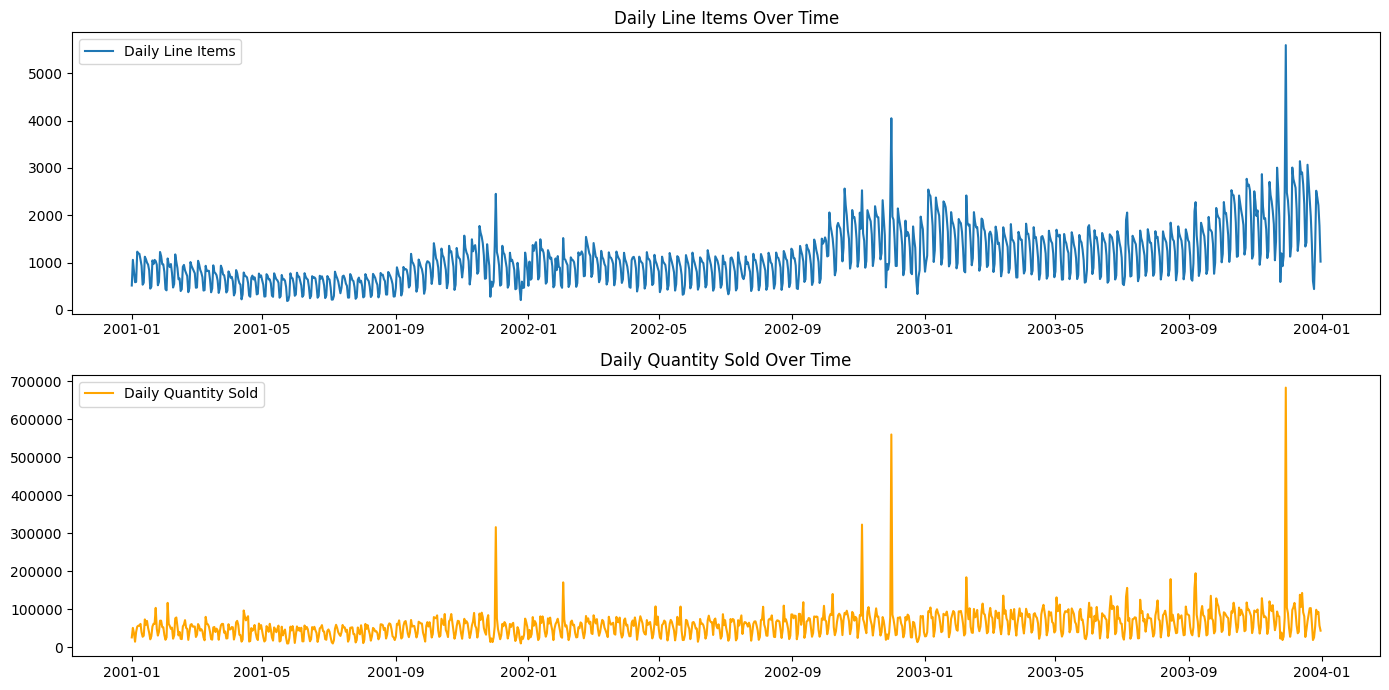

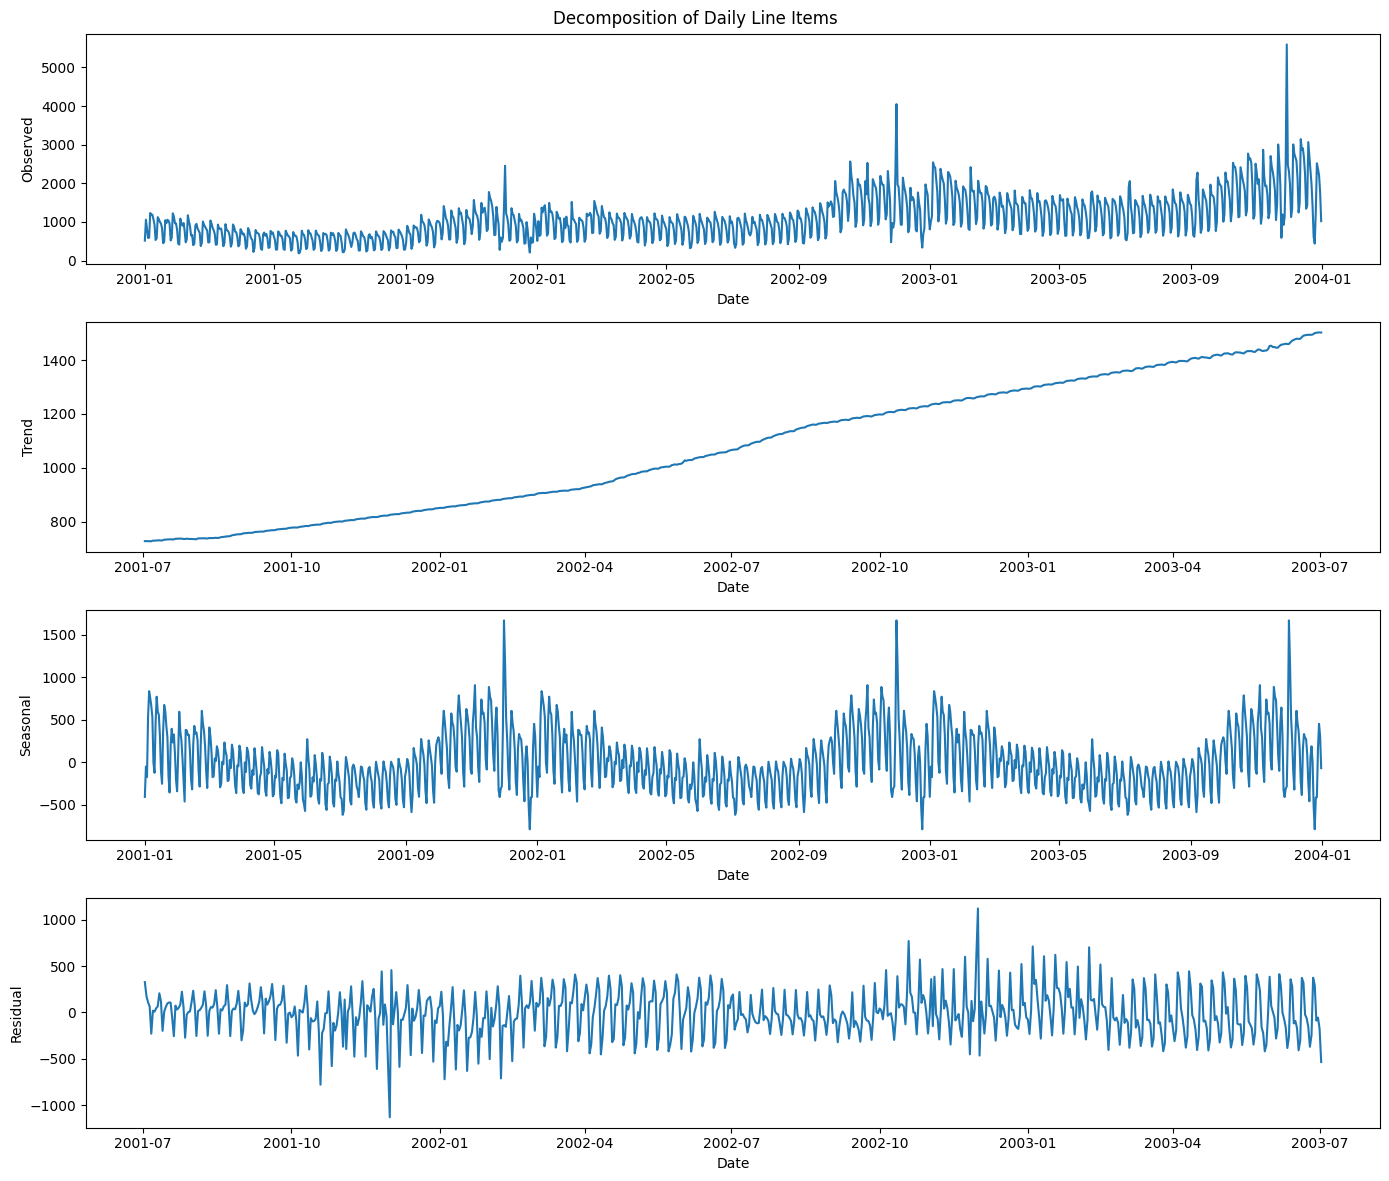

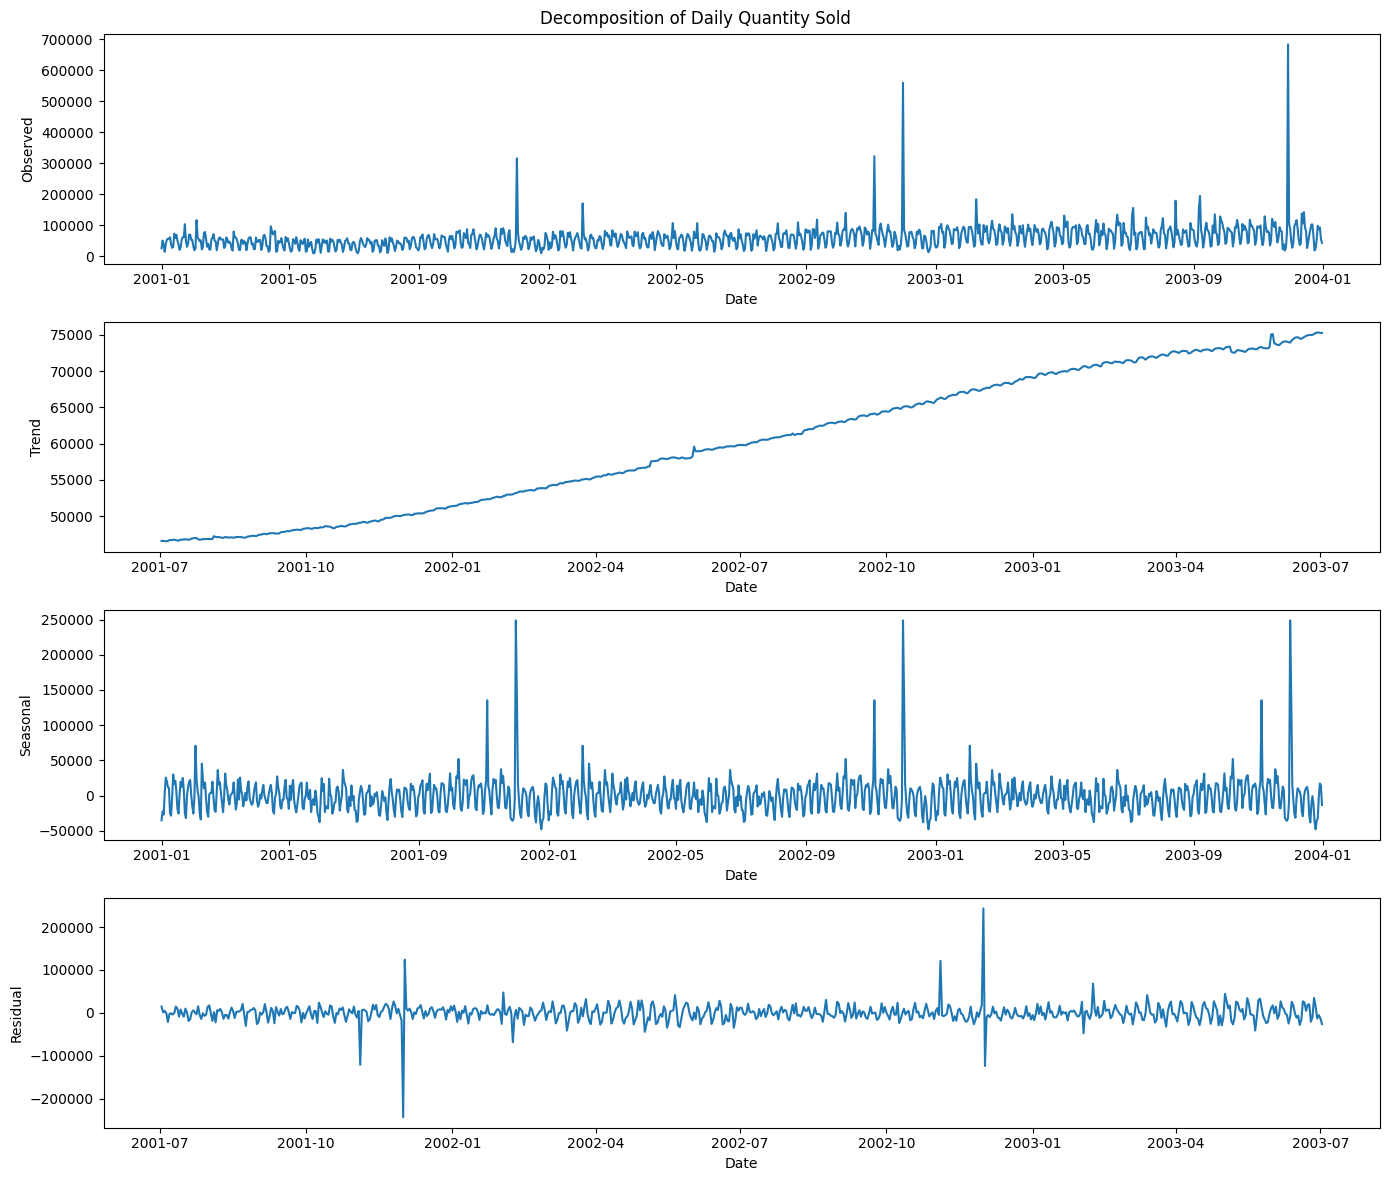

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Assuming you have already loaded and prepared your data as 'order'

# Convert Order_Date to datetime
order['Order_Date'] = pd.to_datetime(order['Order_Date'])

# Aggregate the data by date
daily_data = order.groupby(order['Order_Date'].dt.date).agg({
    'Order_ID': 'nunique',  # Number of unique line items
    'Quantity': 'sum'  # Total quantity sold
}).reset_index()

daily_data.columns = ['Date', 'Daily_Line_Items', 'Daily_Quantity_Sold']

# Set Date as index
daily_data.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(daily_data['Daily_Line_Items'], label='Daily Line Items')
plt.legend(loc='best')
plt.title('Daily Line Items Over Time')

plt.subplot(2, 1, 2)
plt.plot(daily_data['Daily_Quantity_Sold'], label='Daily Quantity Sold', color='orange')
plt.legend(loc='best')
plt.title('Daily Quantity Sold Over Time')

plt.tight_layout()
plt.show()

# Decompose the time series to identify trends and seasonality
result_line_items = seasonal_decompose(daily_data['Daily_Line_Items'], model='additive', period=365)
result_quantity_sold = seasonal_decompose(daily_data['Daily_Quantity_Sold'], model='additive', period=365)

# Plot decomposition results for Daily Line Items
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
result_line_items.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')
result_line_items.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')
result_line_items.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')
result_line_items.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')
plt.suptitle('Decomposition of Daily Line Items')
plt.tight_layout()
plt.show()

# Plot decomposition results for Daily Quantity Sold
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
result_quantity_sold.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')
result_quantity_sold.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')
result_quantity_sold.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')
result_quantity_sold.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')
plt.suptitle('Decomposition of Daily Quantity Sold')
plt.tight_layout()
plt.show()


## Analysis Question 3 (part 1): 

### Explanation of the Charts

The image contains two line charts that visualize different metrics over time, spanning from the beginning of 2001 to the beginning of 2004.

#### Top Chart: Daily Item Line Over Time

##### Key Observations:
1. **Overall Trend**: There is a clear pattern of fluctuation in sales of line items.
2. **Seasonal Variations**: There are recurring peaks and troughs, indicating seasonal or periodic variations.
3. **Significant Spikes**: Noticeable spikes in daily line items occur at several points, particularly around the end of 2003.
4. **General Decline and Increase**: Initially, the number of daily line items appears to decline until mid-2001, followed by stabilization and a gradual increase towards the end of 2003.

#### Bottom Chart: Daily Quantity Sold Over Time

##### Key Observations:
1. **Overall Trend**: The daily quantity sold also shows fluctuations over the years.
2. **Seasonal Variations**: Similar to the top chart, there are recurring peaks and troughs.
3. **Significant Spikes**: A few extreme spikes are visible, especially around late 2002 and late 2003, indicating days with exceptionally high sales volumes.
4. **Periods of Stability**: There are long periods where the daily quantity sold remains relatively stable, with occasional surges.

### Combined Insights
- Both charts demonstrate a pattern of periodic fluctuations, which could be due to seasonal demand, promotions, or other cyclical factors affecting sales.
- Significant spikes in both charts may indicate special events, sales promotions, or other factors leading to unusual increases in line items and quantity sold.
- The trends observed can help in forecasting future demand and preparing for periods of high sales activity.



### Summary and Key Points from the Charts

#### Top Chart: Daily Line Items
- **Fluctuations**: There are noticeable fluctuations and spikes throughout the period.
- **Increasing Trend**: Towards the end of the period, the daily line items show an upward trend.

#### Second Chart: Trend Component
- **Upward Trend**: There is a clear upward trend in the number of daily line items over time.
- **Steady Increase**: The trend increases steadily, indicating consistent growth in daily line items.

#### Third Chart: Seasonal Component
- **Periodic Patterns**: There are recurring seasonal patterns, with peaks and troughs at regular intervals.
- **Seasonal Spikes**: The seasonal component shows spikes, suggesting higher activity during certain periods.

#### Bottom Chart: Residual Component
- **Noise and Outliers**: The residuals appear to be randomly distributed, indicating noise and potential outliers.
- **Variability**: The spread of residuals suggests variability not explained by the trend or seasonal components.

### Combined Insights
- **Steady Growth**: The overall trend shows steady growth in daily line items.
- **Seasonal Influence**: There are clear seasonal patterns affecting daily line items.
- **Unexplained Variability**: The residuals highlight some variability and noise not captured by the trend or seasonal components.



# Dealing with Outliers

> In this block of code, the goal is to identify outliers in the data. The code groups the data by `ID`, calculates the total quantity of orders, and identifies outliers using the Z-score method, defining outliers as those with a Z-score greater than 3. The identified outliers are then saved to a CSV file, and a line chart is created to visualize these outliers by order date. This method is effective because it systematically detects significant deviations and documents the results for further analysis.


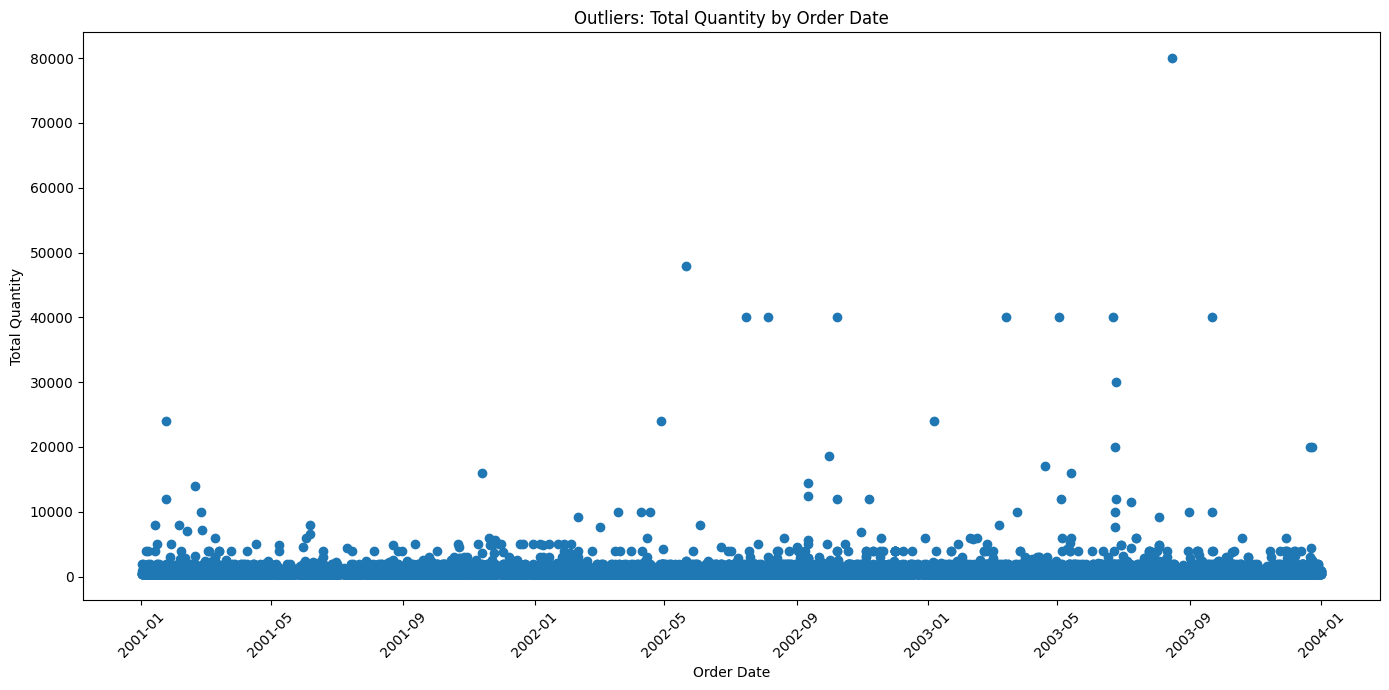

Found 19164 outliers.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Assuming 'order' DataFrame is already loaded

# Group by ID and calculate total quantity and order count
grouped = order.groupby('ID').agg({
    'Quantity': 'sum',
    'Order_Date': 'first',  # Keep the first Order_Date for each ID
}).reset_index()

grouped.columns = ['ID', 'Total_Quantity', 'Order_Date']

# Calculate Z-scores for Total_Quantity
grouped['Quantity_Z'] = np.abs(stats.zscore(grouped['Total_Quantity']))

# Define outliers as those with Z-score > 3
outliers = grouped[grouped['Quantity_Z'] > 3]

# Save outliers to CSV
outliers.to_csv('sell_outliers.csv', index=False)

# Create a scatter plot for outliers
plt.figure(figsize=(14, 7))  # Adjusted figsize to be consistent with other plots
plt.scatter(outliers['Order_Date'], outliers['Total_Quantity'])
plt.title('Outliers: Total Quantity by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Found {len(outliers)} outliers.")

Now let's open the outlier we just created from above code:

In [16]:
outliers = pd.read_csv('sell_outliers.csv')
outliers.head()

,ID,Total_Quantity,Order_Date,Quantity_Z
0,Order 100003_HCRIMP05,400,2001-05-23 13:23:54,3.434005
1,Order 1000325_EPCR0012,600,2003-09-14 21:11:59,5.234447
2,Order 1000325_EPCR0034,600,2003-09-14 21:11:59,5.234447
3,Order 1000327_BLE050,400,2003-09-14 21:13:52,3.434005
4,Order 1000327_PRO1T12,500,2003-09-14 21:13:52,4.334226


### Identifying and Analyzing Outlier Dates in a Dataset with Calendar Event Correlation.

This code block aims to identify the dates with the most outliers, visualize these dates, and check if they coincide with significant calendar events, such as holidays.

Top Dates with the Most Outliers:
Order_Date
2023-07-04    3
2023-12-25    2
2023-11-28    1
2023-12-31    1
Name: count, dtype: int64


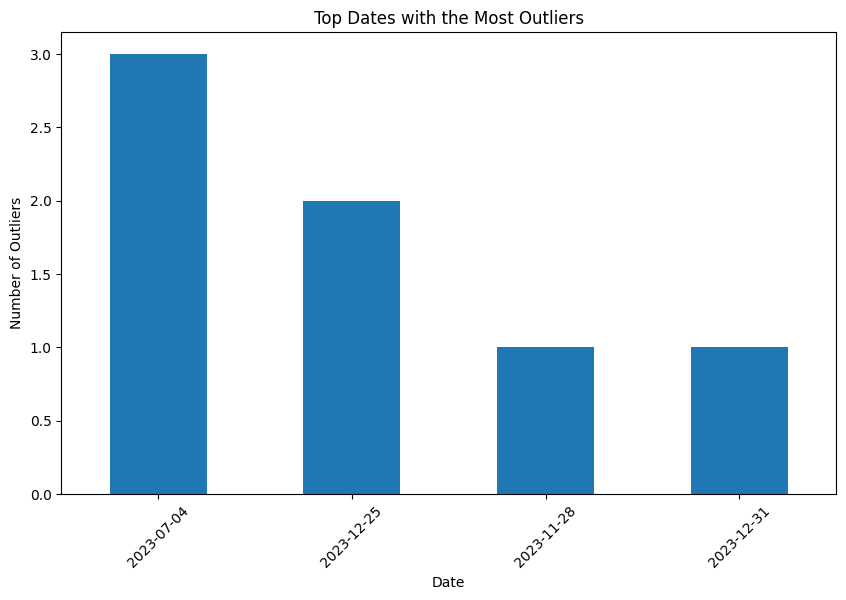

Significant Calendar Events on Top Outlier Dates:
2023-07-04: Independence Day
2023-12-25: Christmas Day


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import holidays  # To check for significant calendar events

# Example data for outliers (replace this with your actual data)
outliers = pd.DataFrame({
    'Order_Date': ['2023-07-04', '2023-12-25', '2023-11-28', '2023-07-04', '2023-12-31', '2023-07-04', '2023-12-25']
})

# Convert Order_Date to datetime
outliers['Order_Date'] = pd.to_datetime(outliers['Order_Date'])

# Count occurrences of each Order_Date
outlier_dates_count = outliers['Order_Date'].dt.date.value_counts()

# Identify the top dates with the most outliers
top_outlier_dates = outlier_dates_count.head(10)
print("Top Dates with the Most Outliers:")
print(top_outlier_dates)

# Plot the top outlier dates
plt.figure(figsize=(10, 6))
top_outlier_dates.plot(kind='bar')
plt.title('Top Dates with the Most Outliers')
plt.xlabel('Date')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.show()

# Check for significant calendar events on those dates
us_holidays = holidays.US()
events = {}
for date in top_outlier_dates.index:
    if date in us_holidays:
        events[date] = us_holidays.get(date)

print("Significant Calendar Events on Top Outlier Dates:")
for date, event in events.items():
    print(f"{date}: {event}")

## Analysis Question 3 (part 3): 

### Handling Outliers

Depending on the context and reason behind the outliers, we can handle them in several ways:

- **Remove the Outliers**: If they are errors or not relevant to the analysis.
- **Cap the Outliers**: Replace them with a maximum threshold value.
- **Keep the Outliers**: If they are genuine and provide meaningful insights.

For this scenario, we decided to cap the outliers, assuming they might be errors or extreme cases. Capping is a method where extreme values are replaced with a maximum threshold value. This approach helps in:

- **Reducing the Impact of Outliers**: By capping, we limit the influence of extreme values on the overall analysis, making the results more robust and reliable.
- **Preserving Data Integrity**: Unlike removing outliers, capping retains all data points, ensuring no information is lost.
- **Simplifying the Analysis**: It avoids the complexity of determining whether an outlier is an error or a genuine extreme value, by simply limiting its influence.


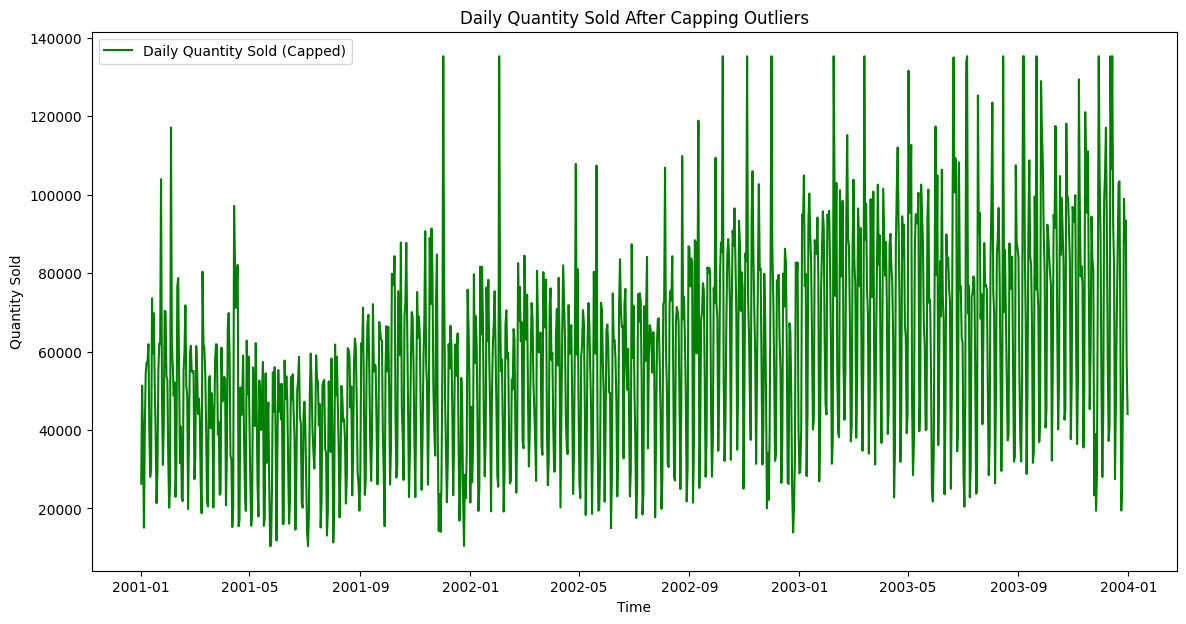

In [19]:
# Calculate Q3 and IQR
Q3 = daily_data['Daily_Quantity_Sold'].quantile(0.75)
Q1 = daily_data['Daily_Quantity_Sold'].quantile(0.25)
IQR = Q3 - Q1

# Calculate the cap value
cap_value = Q3 + 1.5 * IQR

# Cap the outliers
daily_data_capped = daily_data.copy()
daily_data_capped['Daily_Quantity_Sold'] = daily_data_capped['Daily_Quantity_Sold'].apply(lambda x: min(x, cap_value))

# Plot the data after capping outliers
plt.figure(figsize=(14, 7))
plt.plot(daily_data_capped['Daily_Quantity_Sold'], label='Daily Quantity Sold (Capped)', color='green')
plt.legend(loc='best')
plt.title('Daily Quantity Sold After Capping Outliers')
plt.xlabel('Time')  # Adding labels for better understanding
plt.ylabel('Quantity Sold')
plt.show()


# Predict line Item for 2004

> ## Explanation of Code
> This code is designed to predict daily line items and quantities sold for the year 2004 based on historical order data. It involves the following steps:
> ### 1. Data Loading and Preprocessing
> - **Loading Data**: The `load_data` function reads a CSV file containing historical order data.
> - **Preprocessing Data**: The `preprocess_data` function converts order dates to datetime format, handles missing values, creates unique line item identifiers, aggregates daily data, and fills missing dates with zeros.
> ### 2. Data Analysis
> - **Analyzing Data**: The `analyze_data` function visualizes daily line items and quantities sold using line plots.
> ### 3. Forecasting
> - **Forecasting Data**: The `forecast_data` function applies the Holt-Winters Exponential Smoothing method to forecast daily line items and quantities sold for the next year. The results are plotted and saved to a CSV file.
> ### 4. Model Evaluation
> - **Evaluating Model**: The `evaluate_model` function assesses the forecasting model's accuracy by calculating the Mean Absolute Error (MAE) and plotting residuals (differences between actual and predicted values).
> ### 5. Main Function
> - **Main Execution**: The `main` function orchestrates the entire process by calling the aforementioned functions in sequence. It loads and preprocesses the data, performs analysis, forecasts future values, and evaluates the model.

> The code ultimately helps in understanding past sales trends and predicting future sales, aiding in better business decision-making.


Order_ID      object
Order_Date    object
Product_ID    object
Quantity       int64
dtype: object
      Order_ID           Order_Date   Product_ID  Quantity
0  Order 12711  2001-01-15 10:43:20    FC40R1003        10
1  Order 12754  2001-01-15 11:15:00  WEL11A-601R         2
2  Order 12874  2001-01-15 12:47:33        34K77         2
3  Order 13036  2001-01-15 14:56:04     V88J1006         2
4  Order 13036  2001-01-15 14:56:04   V8943N1013         2
            Daily_Line_Items  Daily_Quantity_Sold
Order_Date                                       
2001-01-01              1722                26324
2001-01-02              3023                51312
2001-01-03              2213                37548
2001-01-04              1490                15090
2001-01-05              2108                40666


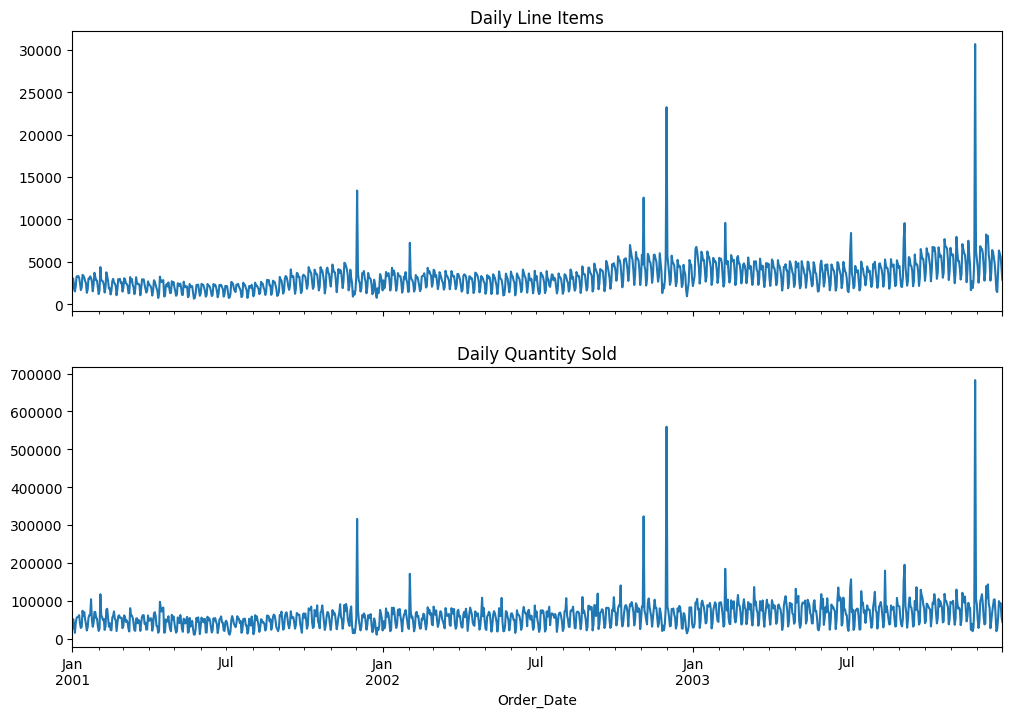

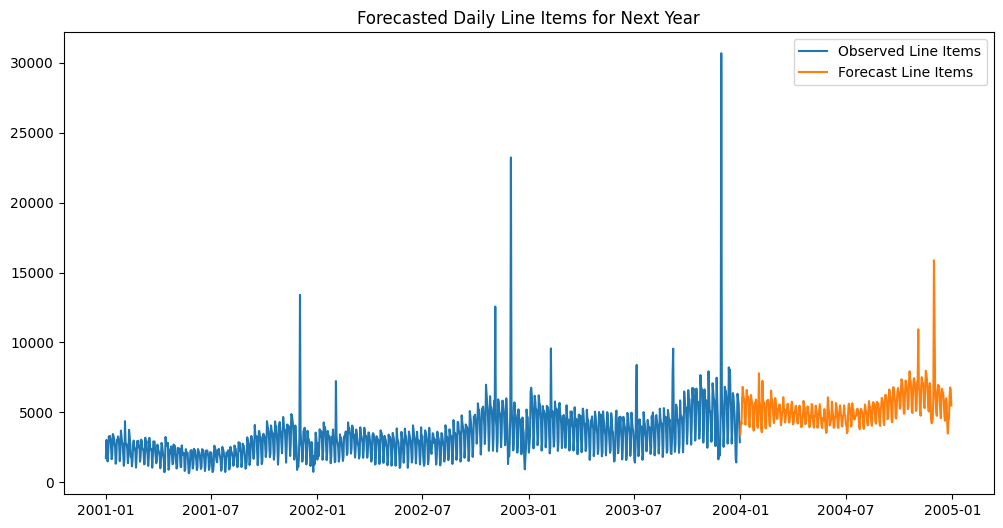

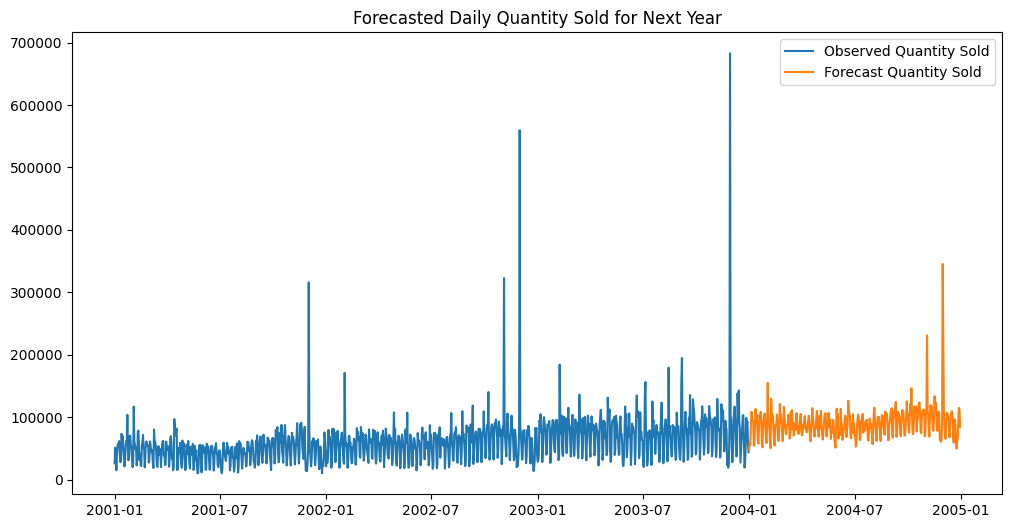

Forecast data saved to forecast_data.csv
MAE for Daily Line Items: 847.5866779922549
MAE for Daily Quantity Sold: 18771.725486830615


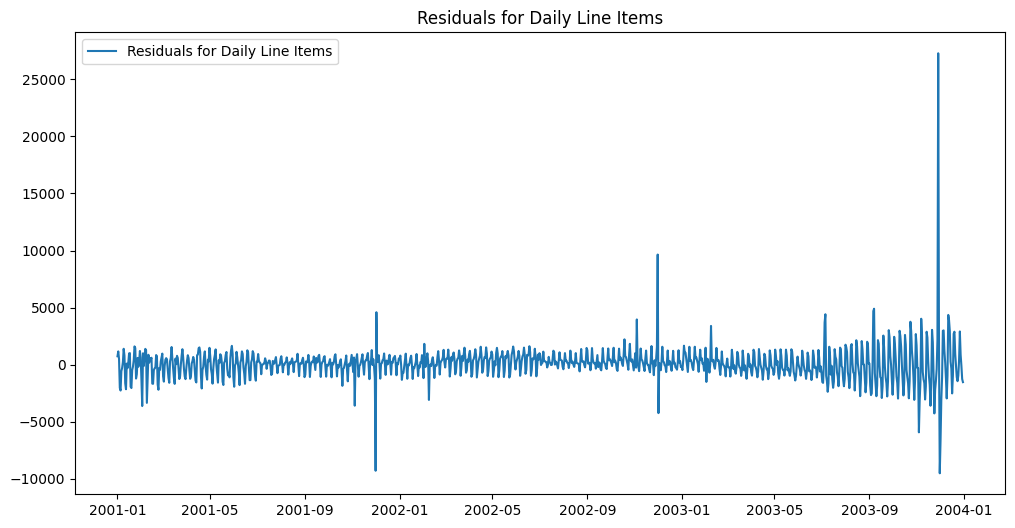

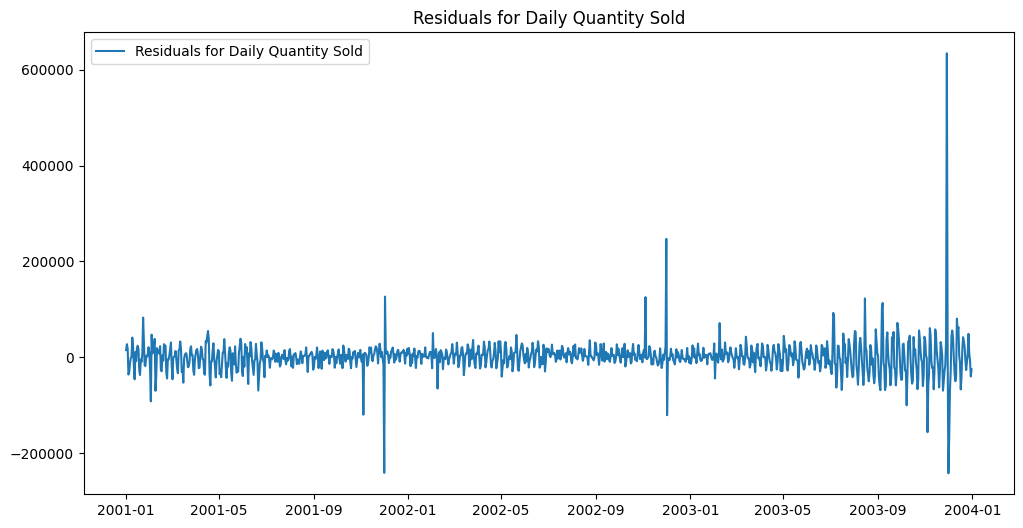

In [20]:
import argparse
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

def load_data(file_path):
    return pd.read_csv(file_path)

def preprocess_data(data):
    data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors='coerce', dayfirst=True)
    data.dropna(subset=['Order_Date'], inplace=True)
    data['Line_Item'] = data['Order_ID'] + '_' + data['Product_ID']
    daily_data = data.groupby(data['Order_Date'].dt.date).agg({
        'Line_Item': 'nunique',
        'Quantity': 'sum'
    }).rename(columns={'Line_Item': 'Daily_Line_Items', 'Quantity': 'Daily_Quantity_Sold'})
    daily_data.index = pd.to_datetime(daily_data.index)
    daily_data = daily_data.asfreq('D', fill_value=0)
    return daily_data

def analyze_data(daily_data):
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    daily_data['Daily_Line_Items'].plot(ax=axes[0], title='Daily Line Items')
    daily_data['Daily_Quantity_Sold'].plot(ax=axes[1], title='Daily Quantity Sold')
    plt.show()

def forecast_data(daily_data):
    model_line_items = ExponentialSmoothing(daily_data['Daily_Line_Items'], trend='add', seasonal='add', seasonal_periods=365)
    model_quantity = ExponentialSmoothing(daily_data['Daily_Quantity_Sold'], trend='add', seasonal='add', seasonal_periods=365)
    
    fit_line_items = model_line_items.fit()
    fit_quantity = model_quantity.fit()
    
    forecast_line_items = fit_line_items.forecast(steps=365)
    forecast_quantity = fit_quantity.forecast(steps=365)

    plt.figure(figsize=(12, 6))
    plt.plot(daily_data.index, daily_data['Daily_Line_Items'], label='Observed Line Items')
    plt.plot(forecast_line_items.index, forecast_line_items, label='Forecast Line Items')
    plt.legend()
    plt.title('Forecasted Daily Line Items for Next Year')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_data.index, daily_data['Daily_Quantity_Sold'], label='Observed Quantity Sold')
    plt.plot(forecast_quantity.index, forecast_quantity, label='Forecast Quantity Sold')
    plt.legend()
    plt.title('Forecasted Daily Quantity Sold for Next Year')
    plt.show()

    # Save the forecast to a CSV file
    forecast_data = pd.DataFrame({
        'Date': forecast_quantity.index,
        'Forecast_Daily_Line_Items': forecast_line_items,
        'Forecast_Daily_Quantity_Sold': forecast_quantity
    })
    forecast_data.to_csv('forecast_data.csv', index=False)
    print("Forecast data saved to forecast_data.csv")

def evaluate_model(daily_data):
    model_line_items = ExponentialSmoothing(daily_data['Daily_Line_Items'], trend='add', seasonal='add', seasonal_periods=365)
    model_quantity = ExponentialSmoothing(daily_data['Daily_Quantity_Sold'], trend='add', seasonal='add', seasonal_periods=365)
    
    fit_line_items = model_line_items.fit()
    fit_quantity = model_quantity.fit()

    predicted_line_items = fit_line_items.fittedvalues
    predicted_quantity = fit_quantity.fittedvalues

    mae_line_items = mean_absolute_error(daily_data['Daily_Line_Items'], predicted_line_items)
    mae_quantity = mean_absolute_error(daily_data['Daily_Quantity_Sold'], predicted_quantity)

    print(f'MAE for Daily Line Items: {mae_line_items}')
    print(f'MAE for Daily Quantity Sold: {mae_quantity}')

    # Calculate residuals
    residuals_line_items = daily_data['Daily_Line_Items'] - predicted_line_items
    residuals_quantity = daily_data['Daily_Quantity_Sold'] - predicted_quantity

    # Plot residuals
    plt.figure(figsize=(12, 6))
    plt.plot(residuals_line_items, label='Residuals for Daily Line Items')
    plt.legend()
    plt.title('Residuals for Daily Line Items')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(residuals_quantity, label='Residuals for Daily Quantity Sold')
    plt.legend()
    plt.title('Residuals for Daily Quantity Sold')
    plt.show()

def main():
    file_path = 'Assessment_Data/Assessment Data2.csv'
    data = load_data(file_path)
    print(data.dtypes)
    print(data.head())
    
    daily_data = preprocess_data(data)
    print(daily_data.head())

    analyze_data(daily_data)

    forecast_data(daily_data)
    
    evaluate_model(daily_data)

if __name__ == "__main__":
    main()

## Observations
- The **Observed Line Items** line shows significant fluctuations and several peaks throughout the years, indicating periods of higher sales or activity.
- The **Forecast Line Items** line shows the predicted values starting from mid-2004, continuing the trend from the observed data but with a slightly smoother pattern.
- The model captures the general trend and seasonality in the historical data, providing a reasonable forecast for the future daily line items.


In [21]:
# Let's load and view the forecast for 2004 in tabular format. It is for 365 Days.

forecast_2004 = pd.read_csv('forecast_data.csv')
forecast_2004.head()

,Date,Forecast_Daily_Line_Items,Forecast_Daily_Quantity_Sold
0,2004-01-01,3424.033825,47787.686087
1,2004-01-02,4299.589270,60423.816972
2,2004-01-03,4160.662745,55835.767709
3,2004-01-04,5961.397550,87446.995474
4,2004-01-05,6818.535102,108576.337616
